#### Mochamad Aulia Akbar Praditomo
#### 1606827145
#### DSA-B

# Tugas Lab 4

In [18]:
import pandas as pd

 #### Read JSON File

In [19]:
import json
file_path = 'Sentiment/data_latih.json'
df = pd.read_json(file_path)
df.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,@AhokDjarot Melayani warga jakarta mulai dari ...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif,Tue Apr 04 13:50:01 +0000 2017


### Text Processing

Netral menjadi 0, positif 1, negatif 2.

In [20]:
factor = pd.factorize(df['sentimen'])
definition = factor[1]
df.sentimen = factor[0]
df.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,0,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,@AhokDjarot Melayani warga jakarta mulai dari ...,1,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,2,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,1,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,1,Tue Apr 04 13:50:01 +0000 2017


Stopword removal and stemming

Import stopword dari library Sastrawi lalu stopword tersebut ditambah dari data yang ada di stopword_list_TALA.txt. Selanjutnya buat stemmer dan key norm untuk keperluan konversi kata non baku menjadi kata baku.

In [21]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, ArrayDictionary, StopWordRemover
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re

stopwords = StopWordRemoverFactory().get_stop_words()
file_stop = open("Sentiment/stopword_list_TALA.txt", "r")
stop_additional = file_stop.read()
for word in stop_additional.split():
    stopwords.append(word)
dictionary = ArrayDictionary(stopwords)
stopword = StopWordRemover(dictionary)

stem = StemmerFactory()
stemmer = stem.create_stemmer()

key_norm = pd.read_csv('Sentiment/key_norm.csv')
key_norm_dict = {}
for nonbaku, baku in zip(key_norm['singkat'], key_norm['hasil']):
    key_norm_dict[nonbaku] = baku

Punctuation removal and remove repeated characters

fungsi removeStopwordStem untuk remove stopword dan stem, fungsi makeBaku untuk mengubah kata non baku menjadi baku, serta fungsi pre_processing. Fungsi pre_processing ini urutannya adalah lower casing, remove username dan url, remove punctuation, remove repeating characters, remove extra space, trimming.

In [22]:
def removeStopwordStem(text):
    text = stopword.remove(text)
    text = stemmer.stem(text)
    return " ".join(text.split())

def makeBaku(text):
    split_text = text.split(" ")
    for word_index in range(len(split_text)):
        if split_text[word_index] in key_norm_dict:
            split_text[word_index] = key_norm_dict[split_text[word_index]]
    return " ".join(split_text)

def pre_processing(tweet_list):
    data_clean = []
    for tweet in tweet_list:
        clean_str = tweet.lower() 
        clean_str = re.sub(r"(?:\@|https?\://)\S+", " ", clean_str) 
        clean_str = re.sub(r'[^\w\s]',' ',clean_str) 
        rpt_regex = re.compile(r"(.)\1{1,}", re.IGNORECASE) 
        clean_str = rpt_regex.sub(r'\1', clean_str)
        clean_str = re.sub('\s+', ' ', clean_str) 
        clean_str = clean_str.strip() 
        clean_str = makeBaku(clean_str)
        clean_str = removeStopword(clean_str) 
        data_clean.append(clean_str)
    return data_clean

Pemanggilan fungsi pre_processing untuk feature extraction yaitu membuat kolom clean yang berisi text yang sudah dipre-process.

In [23]:
df['isi'] = df['isi'].astype('str')
df = df.drop_duplicates(subset=['isi'], keep='first')
#preprocessing
df['clean'] = pre_processing(df['isi'])
positif = df["clean"][df["sentimen"]==1]
negatif = df["clean"][df["sentimen"]==2]
netral = df["clean"][df["sentimen"]==0]
df = df[(df.clean != '')]
df.head()

,akun,id_user,isi,sentimen,tanggal,clean
0,@AhokDjarot,823082326213021696,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,0,Tue Apr 04 14:04:05 +0000 2017,penasaran basukidjarot pertanyankepo kepoinpel...
1,@AhokDjarot,3166296157,@AhokDjarot Melayani warga jakarta mulai dari ...,1,Tue Apr 04 14:00:01 +0000 2017,layan warga jakarta lahir program freahok
2,@AhokDjarot,799108167170949121,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,2,Tue Apr 04 13:56:37 +0000 2017,golong sumbu pendek fpi piaran keluarga cendan...
3,@AhokDjarot,710566116553166849,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,1,Tue Apr 04 13:52:44 +0000 2017,ahok didzolimi ahok bebas freahok
4,@AhokDjarot,1335669534,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,1,Tue Apr 04 13:50:01 +0000 2017,prof edward omar sharif ahli pidana pndpt ahli...


### Word Cloud

positif


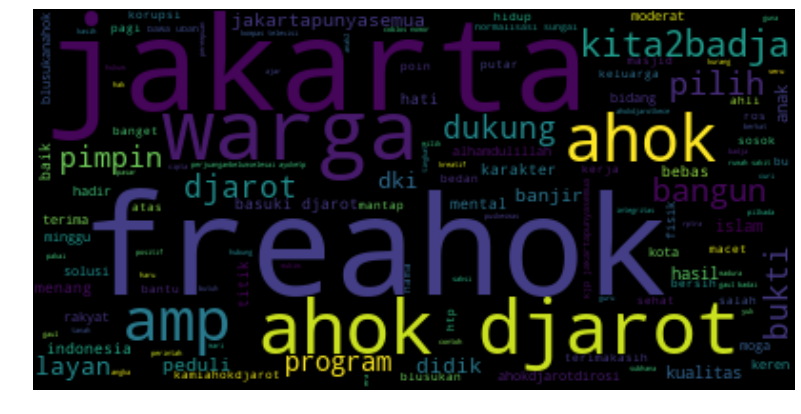

negatif


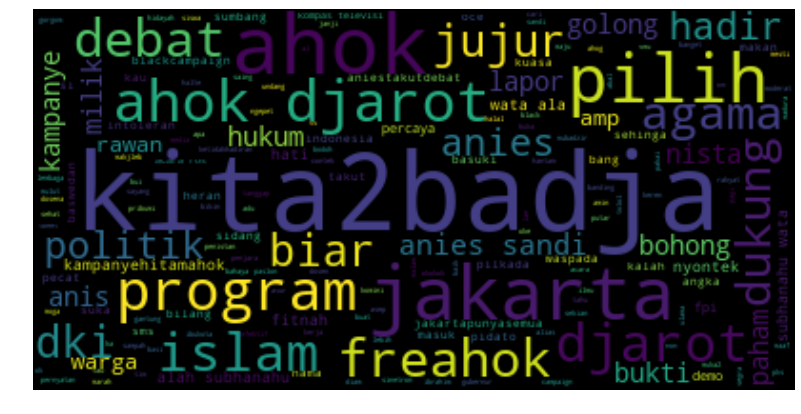

netral


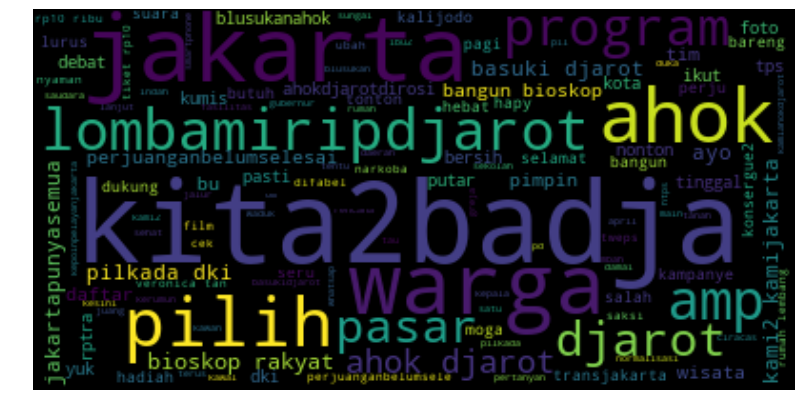

In [24]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

print('positif')
wordcloud = WordCloud(random_state=21).generate(" ".join(positif))
plt.figure(figsize = (15,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

print('negatif')
wordcloud = WordCloud(random_state=21).generate(" ".join(negatif))
plt.figure(figsize = (15,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

print('netral')
wordcloud = WordCloud(random_state=21).generate(" ".join(netral))
plt.figure(figsize = (15,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

### Feature Extraction

Pemisahan data train dan test

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
train_x, test_x, train_y, test_y = train_test_split(df['clean'], df['sentimen'],
test_size = 0.30, random_state = 5)

Feature extraction dengan bag of words (n-bag) dan TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

count_vect = CountVectorizer(analyzer='word', ngram_range=(2,2))

count_vect.fit(train_x)
train_x_feat = count_vect.transform(train_x)
test_x_feat = count_vect.transform(test_x)

vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=4000,min_df=2)
vectorizer.fit(train_x)
tfidf_matrix_xtrain = vectorizer.transform(train_x)
tfidf_matrix_xtest = vectorizer.transform(test_x)

### Classification

Setelah itu menggunakan 3 classifier untuk masing-masing fitur yang dipilih. Classifier tersebut adalah Multinomial Naive Bayes, Gaussian Naive Bayes, dan Logistic Regression. masing-masing tes dilakukan menggunakan cross validation dengan cv = 10.

In [27]:
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_recall_fscore_support, classification_report
from sklearn.model_selection import cross_validate
import numpy as np

In [28]:
#Use n-bag to MultinomialNB classifier

classifier = naive_bayes.MultinomialNB()
classifier.fit(train_x_feat.toarray(), train_y)
pred_y_result = classifier.predict(test_x_feat.toarray())
reversefactor = dict(zip(range(3), definition))
#reverse the test_y label to actual label
test_y_result = np.vectorize(reversefactor.get)(test_y)
#reverse the pred_y label to actual label
pred_y_result = np.vectorize(reversefactor.get)(pred_y_result)
print(pred_y_result[0:12])
print(test_y_result[0:12])
accuracy = accuracy_score(test_y_result, pred_y_result)
print("accuracy : %f" % accuracy)

count_vect = CountVectorizer(analyzer='word', ngram_range=(2,2))
count_vect.fit(df['clean'])
x_data = count_vect.transform(df['clean'])
fold = cross_validate(classifier, x_data.toarray(),df['sentimen'], cv=10)
print("fold : %f" % fold['test_score'].mean())

['positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'netral' 'positif']
['netral' 'positif' 'negatif' 'negatif' 'netral' 'positif' 'negatif'
 'netral' 'positif' 'positif' 'positif' 'negatif']
accuracy : 0.503268
fold : 0.486787


In [29]:
#use tfidf to MultinomialNB classifier

classifier = naive_bayes.MultinomialNB()
classifier.fit(tfidf_matrix_xtrain.toarray(), train_y)
pred_y_result = classifier.predict(tfidf_matrix_xtest.toarray())
reversefactor = dict(zip(range(3), definition))
#reverse the test_y label to actual label
test_y_result = np.vectorize(reversefactor.get)(test_y)
#reverse the pred_y label to actual label
pred_y_result = np.vectorize(reversefactor.get)(pred_y_result)
print(pred_y_result[0:12])
print(test_y_result[0:12])
accuracy = accuracy_score(test_y_result, pred_y_result)
print("accuracy : %f" % accuracy)

count_vect = TfidfVectorizer(ngram_range=(1, 1), max_features=4000,min_df=2)
count_vect.fit(df['clean'])
x_data = count_vect.transform(df['clean'])
fold = cross_validate(classifier, x_data.toarray(),df['sentimen'], cv=10)
print("fold : %f" % fold['test_score'].mean())

['positif' 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'netral' 'positif' 'positif']
['netral' 'positif' 'negatif' 'negatif' 'netral' 'positif' 'negatif'
 'netral' 'positif' 'positif' 'positif' 'negatif']
accuracy : 0.522876
fold : 0.554089


In [30]:
#use n-bag to GaussianNB classifier

classifier = naive_bayes.GaussianNB()
classifier.fit(train_x_feat.toarray(), train_y)
pred_y_result = classifier.predict(test_x_feat.toarray())
reversefactor = dict(zip(range(3), definition))
#reverse the test_y label to actual label
test_y_result = np.vectorize(reversefactor.get)(test_y)
#reverse the pred_y label to actual label
pred_y_result = np.vectorize(reversefactor.get)(pred_y_result)
print(pred_y_result[0:12])
print(test_y_result[0:12])
accuracy = accuracy_score(test_y_result, pred_y_result)
print("accuracy : %f" % accuracy)

count_vect = CountVectorizer(analyzer='word', ngram_range=(2,2))
count_vect.fit(df['clean'])
x_data = count_vect.transform(df['clean'])
fold = cross_validate(classifier, x_data.toarray(),df['sentimen'], cv=10)
print("fold : %f" % fold['test_score'].mean())

['negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'netral' 'positif'
 'negatif' 'positif' 'negatif' 'netral' 'negatif']
['netral' 'positif' 'negatif' 'negatif' 'netral' 'positif' 'negatif'
 'netral' 'positif' 'positif' 'positif' 'negatif']
accuracy : 0.509804
fold : 0.480246


In [31]:
#use tfidf to GaussianNB classifier

classifier = naive_bayes.GaussianNB()
classifier.fit(tfidf_matrix_xtrain.toarray(), train_y)
pred_y_result = classifier.predict(tfidf_matrix_xtest.toarray())
reversefactor = dict(zip(range(3), definition))
#reverse the test_y label to actual label
test_y_result = np.vectorize(reversefactor.get)(test_y)
#reverse the pred_y label to actual label
pred_y_result = np.vectorize(reversefactor.get)(pred_y_result)
print(pred_y_result[0:12])
print(test_y_result[0:12])
accuracy = accuracy_score(test_y_result, pred_y_result)
print("accuracy : %f" % accuracy)

count_vect = TfidfVectorizer(ngram_range=(1, 1), max_features=4000,min_df=2)
count_vect.fit(df['clean'])
x_data = count_vect.transform(df['clean'])
fold = cross_validate(classifier, x_data.toarray(),df['sentimen'], cv=10)
print("fold : %f" % fold['test_score'].mean())

['positif' 'netral' 'netral' 'negatif' 'negatif' 'netral' 'positif'
 'positif' 'positif' 'netral' 'positif' 'positif']
['netral' 'positif' 'negatif' 'negatif' 'netral' 'positif' 'negatif'
 'netral' 'positif' 'positif' 'positif' 'negatif']
accuracy : 0.464052
fold : 0.528131


In [32]:
#use n-bag to logistic regression

classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier.fit(train_x_feat.toarray(), train_y)
pred_y_result = classifier.predict(test_x_feat.toarray())
reversefactor = dict(zip(range(3), definition))
#reverse the test_y label to actual label
test_y_result = np.vectorize(reversefactor.get)(test_y)
#reverse the pred_y label to actual label
pred_y_result = np.vectorize(reversefactor.get)(pred_y_result)
print(pred_y_result[0:12])
print(test_y_result[0:12])
accuracy = accuracy_score(test_y_result, pred_y_result)
print("accuracy : %f" % accuracy)

count_vect = CountVectorizer(analyzer='word', ngram_range=(2,2))
count_vect.fit(df['clean'])
x_data = count_vect.transform(df['clean'])
fold = cross_validate(classifier, x_data.toarray(),df['sentimen'], cv=10)
print("fold : %f" % fold['test_score'].mean())

['positif' 'positif' 'negatif' 'negatif' 'negatif' 'positif' 'positif'
 'negatif' 'positif' 'negatif' 'positif' 'negatif']
['netral' 'positif' 'negatif' 'negatif' 'netral' 'positif' 'negatif'
 'netral' 'positif' 'positif' 'positif' 'negatif']
accuracy : 0.562092
fold : 0.471249


In [33]:
#use tfidf to logistic regression

classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier.fit(tfidf_matrix_xtrain.toarray(), train_y)
pred_y_result = classifier.predict(tfidf_matrix_xtest.toarray())
reversefactor = dict(zip(range(3), definition))
#reverse the test_y label to actual label
test_y_result = np.vectorize(reversefactor.get)(test_y)
#reverse the pred_y label to actual label
pred_y_result = np.vectorize(reversefactor.get)(pred_y_result)
print(pred_y_result[0:12])
print(test_y_result[0:12])
accuracy = accuracy_score(test_y_result, pred_y_result)
print("accuracy : %f" % accuracy)

count_vect = TfidfVectorizer(ngram_range=(1, 1), max_features=4000,min_df=2)
count_vect.fit(df['clean'])
x_data = count_vect.transform(df['clean'])
fold = cross_validate(classifier, x_data.toarray(),df['sentimen'], cv=10)
print("fold : %f" % fold['test_score'].mean())

['positif' 'netral' 'positif' 'negatif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'netral' 'positif' 'positif']
['netral' 'positif' 'negatif' 'negatif' 'netral' 'positif' 'negatif'
 'netral' 'positif' 'positif' 'positif' 'negatif']
accuracy : 0.549020
fold : 0.563704


Untuk n-bag, klasifikasi paling akurat yaitu dengan classifier Multinomial Naïve Bayes.
Untuk TF-IDF, klasifikasi paling akurat yaitu dengan classifier Logistic Regression.
Untuk setiap classifier, akurasi yang selalu lebih bagus adalah dengan TF-IDF.